# Reward function


This notebook serves to test a possible reward function that uses a combination of QoS and transmission power. The idea behind this function is to make the agent search for the best possible QoS (maximum of 1) by reducing the power used in this process.

The proposed function is

$reward = \left\{\begin{matrix}
\min \left (0.6, scale_1 * \left [ qos^2 + \frac{power^2}{b_1} \right ] \right ) & \text{if } x < 0.6\\ 
\max \left (0.6, 1 - scale_2 * \left [(qos - 1)^2 + \frac{power^2}{b_2} \right ] \right ) & x \ge 0.6
\end{matrix}\right.$

$scale_1$ and $scale_2$ are scale factors to keep the reward $\in [0,1]$.
$b_1$ and $b_2$ shape the curves.

In [1]:
import numpy as np
import matplotlib.pyplot as plot
import pylab
from pylab import cm, contour, clabel, colorbar
import os

%matplotlib inline

## generate qos and power between 0 and 1

In [2]:
qos = np.linspace(0, 1, 1000)
tput = np.linspace(0, 1, 1000)

X, Y = (qos, tput)

## reward function

In [3]:
def reward(qos, power):
    """ this function goes to the agent
        it receives two scaled parameters (between 0 and 1), and 
        returns the reward between 0 and 1
    """
    if qos < 0.62:
        r = min((np.square(qos) + np.square(power - 1) / 10.0) / 0.6, 0.6)
    else:
        r = max(1 - (np.square(qos - 1) + np.square(power) / 20.0) / 0.285, 0.6)
    return r

In [4]:
# Z values as a matrix
Z = np.ndarray((len(X),len(Y)))

In [5]:
# Populate Z Values (a 7x7 matrix) - For a circle x^2+y^2=z    
for i in range(0, len(X)):
    x = X[i]
    for j in range(0, len(Y)):
        y = Y[j]
        Z[j][i] = reward(x, y)

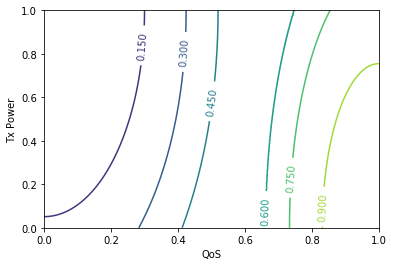

In [6]:
f = plot.figure()

# Set the x axis and y axis limits
pylab.xlim([min(X), max(X)])
pylab.ylim([min(Y), max(Y)])

# Provide a title for the contour plot
# plot.title('Contour plot')

# Set x axis label for the contour plot
plot.xlabel('QoS')

# Set y axis label for the contour plot
plot.ylabel('Tx Power')

# Create contour lines or level curves using matplotlib.pyplot module
contours = plot.contour(X, Y, Z)

# Display z values on contour lines
plot.clabel(contours, inline=1, fontsize=10)

# Display the contour plot
plot.show()

In [7]:
pdf_filename = "reward_function.pdf"
f.savefig(pdf_filename)
os.system("pdfcrop {} {}".format(pdf_filename, pdf_filename))

0

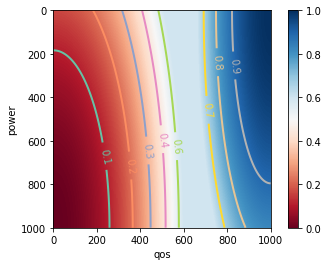

In [8]:
im = plot.imshow(Z, cmap=cm.RdBu)
# plt.xticks(labels)
# plt.yticks(labels)
ax = plot.gca()
ax.set_xlabel('qos')
ax.set_ylabel('power')


# adding the Contour lines with labels
cset = contour(Z, np.linspace(0, 1, 10), linewidths=2, cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)

colorbar(im) # adding the colobar on the right